<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/05_02_LAB_VideoGameSales_28_%E7%8E%8B%E9%9F%8B%E5%8D%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 載入與整理資料

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [9]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()
# 不合適 不轉換

In [14]:
# 查看一下資料的基本統計值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

長尾效應
有離峰值

# 哪一種類的電玩最受歡迎

In [16]:
# 計算各種電玩類別的總數
Genre_num = data.groupby(by=['Genre']).size()
Genre_num
# data['Genre'].value_counts()

,0
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


In [34]:
# 練習題
# 找出遊戲總數最多的前三年
data['Year'].value_counts().head(3)

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259


In [28]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商
group = data.groupby(by= ['Platform']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
group.head(3)

,Platform,count
4,DS,2163
16,PS2,2161
17,PS3,1329


In [ ]:
# 練習題
# 找出遊戲總數最多的前三個平台
group = data.groupby(by= ['Publisher']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
group.head(3)

In [ ]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台


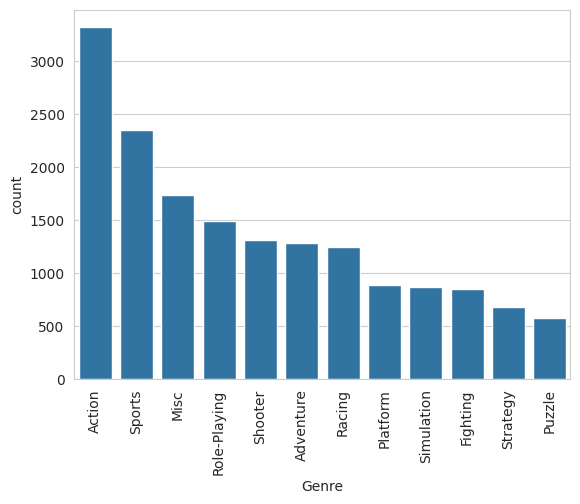

In [52]:
# 畫出直方圖用來顯示不同電玩總類的總數
Genre_num = data['Genre'].value_counts()

sns.countplot(data, x = 'Genre',order = Genre_num.index)
plt.xticks(rotation=90)
plt.show()

   Platform  count
4        DS   2163
16      PS2   2161
17      PS3   1329
26      Wii   1325
28     X360   1265
19      PSP   1213
15       PS   1196
13       PC    960
29       XB    824
6       GBA    822
7        GC    556
2       3DS    509
20      PSV    413
18      PS4    336
10      N64    319
23     SNES    239
30     XOne    213
21      SAT    173
27     WiiU    143
0      2600    133
11      NES     98
5        GB     98
3        DC     52
8       GEN     27
12       NG     12
22      SCD      6
25       WS      6
1       3DO      3
24     TG16      2
14     PCFX      1
9        GG      1


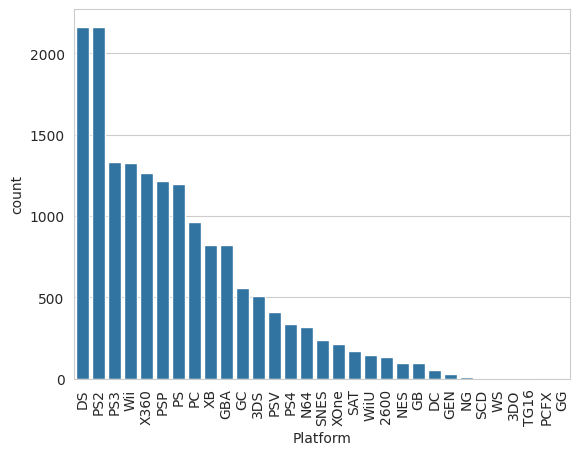

In [62]:
#練習題
#畫出每個平台的遊戲數目
group = data.groupby(by= ['Platform']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
print(group)
sns.countplot(data, x = 'Platform',order = group['Platform'])
plt.xticks(rotation=90)
plt.show()

                        Publisher  count
138               Electronic Arts   1351
21                     Activision    975
347            Namco Bandai Games    932
525                       Ubisoft    921
275  Konami Digital Entertainment    832
..                            ...    ...
403                     Playmates      1
404                      Playmore      1
405                        Plenty      1
406                   Pony Canyon      1
435                  SCS Software      1

[578 rows x 2 columns]


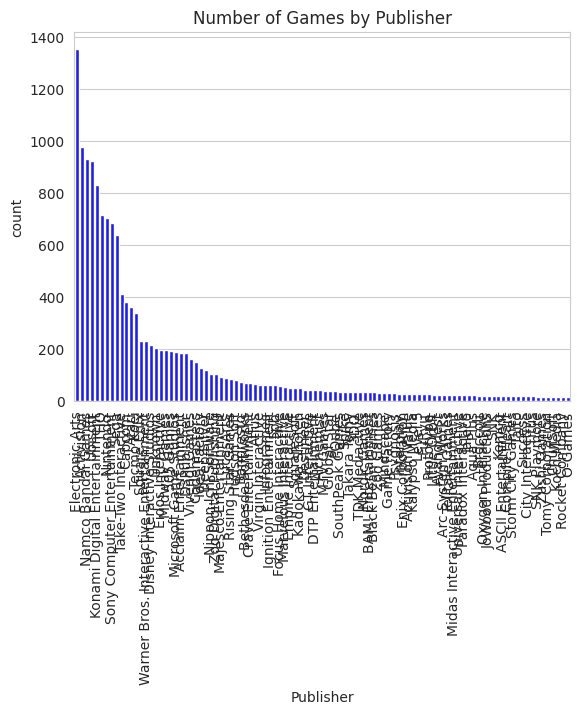

In [78]:
#練習題
#畫出每個發行商的遊戲數目

group = data.groupby(by= ['Publisher']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
print(group)
sns.countplot(data, x = 'Publisher',order = group['Publisher'][:100], color='b')
plt.xticks(rotation=90)
plt.title('Number of Games by Publisher')
plt.show()

# Publisher_num = data['Publisher'].value_counts()

# sns.countplot(data, x = 'Publisher',order = Publisher_num.index)
# plt.xticks(rotation=90)
# plt.show()

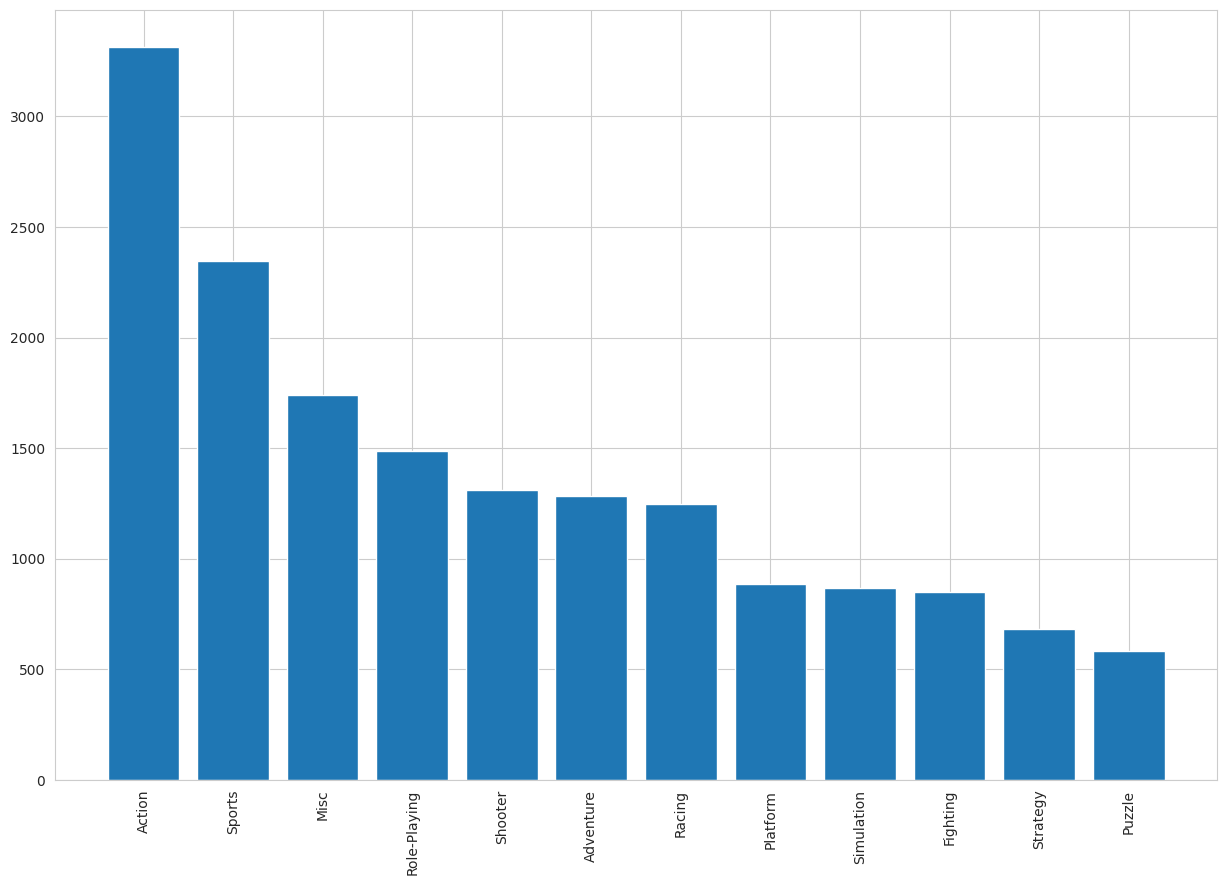

In [82]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)
Genre_num = data['Genre'].value_counts()

plt.figure(figsize=(15, 10))
plt.bar(x = Genre_num.index,height = Genre_num)

plt.xticks(rotation=90)
plt.show()


# 每年的遊戲數目 countplot()

In [49]:
# 統計每一年遊戲發行的總數
group = data.groupby(by= ['Year']).size().reset_index(name='count')
group

,Year,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


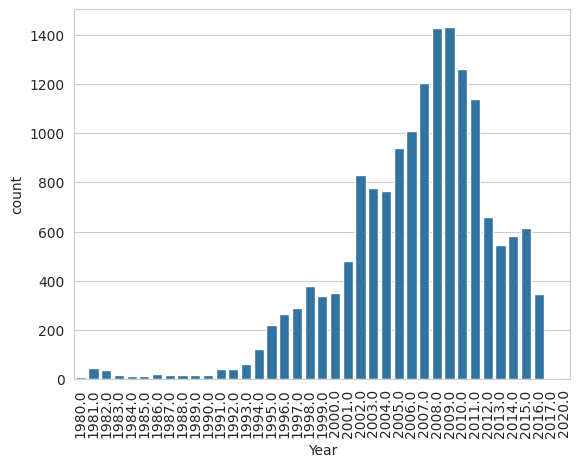

In [51]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
sns.countplot(data, x = 'Year')
plt.xticks(rotation=90)
plt.show()

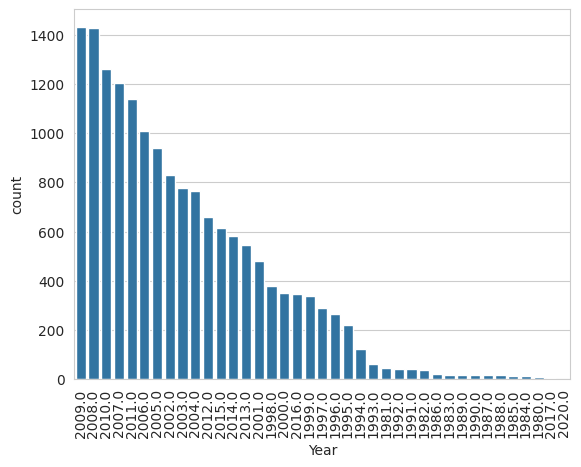

In [57]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
year_order = data['Year'].value_counts().sort_values(ascending=False)

# 繪製條形圖並根據排序的年份順序設置 order
sns.countplot(data=data, x='Year', order=year_order.index)
plt.xticks(rotation=90)
plt.show()

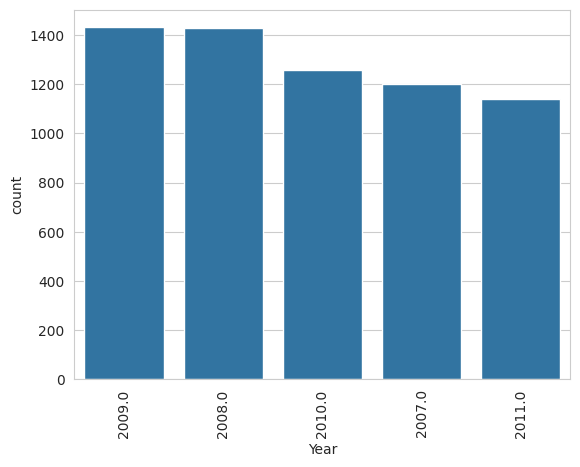

In [59]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
year_order = data['Year'].value_counts().sort_values(ascending=False)

# 繪製條形圖並根據排序的年份順序設置 order
sns.countplot(data=data, x='Year', order=year_order.index[:5])
plt.xticks(rotation=90)
plt.show()

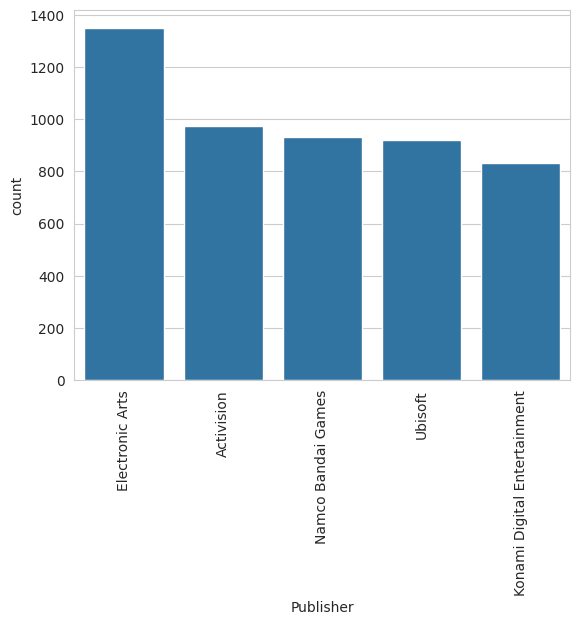

In [83]:
# 練習題
# 畫出發行遊戲最多的前五名發行商
Publisher_order = data['Publisher'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Publisher', order=Publisher_order.index[:5])
plt.xticks(rotation=90)
plt.show()

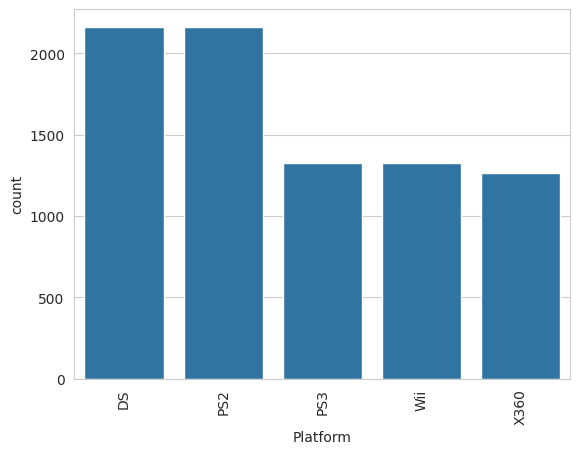

In [84]:
# 練習題
# 畫出發行遊戲最多的前五種平台
Platform_order = data['Platform'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Platform', order=Platform_order.index[:5])
plt.xticks(rotation=90)
plt.show()

### 加入hue

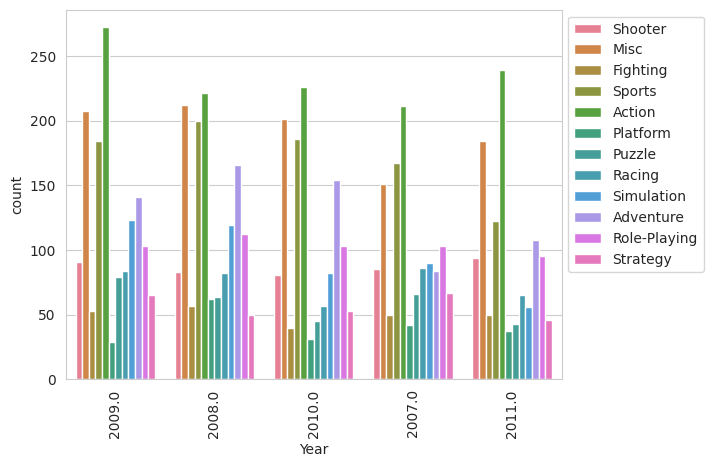

In [86]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
year_order = data['Year'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Year', order=year_order.index[:5], hue = 'Genre')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

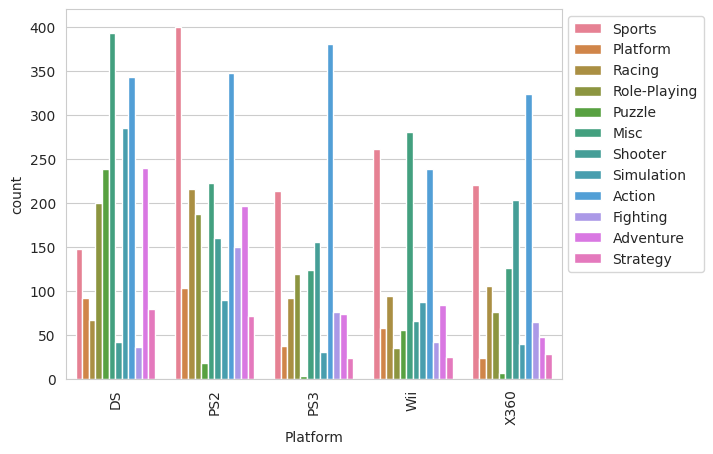

In [87]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目
Platform_order = data['Platform'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Platform', order=Platform_order.index[:5], hue = 'Genre')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

# 每年的遊戲銷售總量 barplot()

<ipython-input-97-132ab4125a3a>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

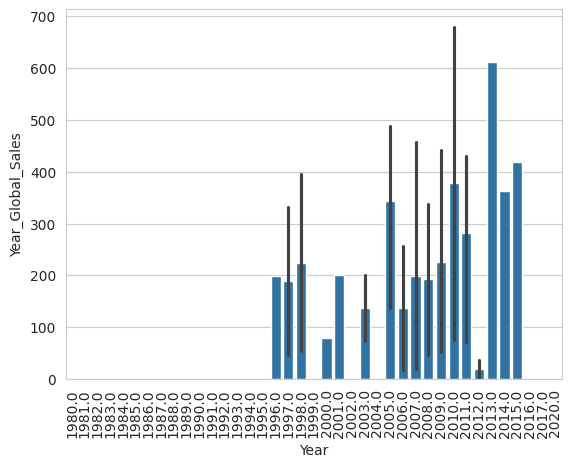

In [97]:
# 計算每年遊戲的銷售總量
clonedata = data.copy()
clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)
print(clonedata)
sns.barplot(data, x='Year', y='Year_Global_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 將Year從索引重新變成欄位


In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量


In [ ]:
# 將上圖依照全年銷售額來排序


In [ ]:
#練習題
#請畫出各平台的銷售總額


In [ ]:
#練習題
#請畫出各遊戲種類的北美銷售總額


In [ ]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額


## 每年分別哪一種遊戲種類的發行數目最多？

In [ ]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數


In [ ]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量


In [ ]:
#將上面的結束使用transform對應回去原本的資料表


In [ ]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣


In [ ]:
#將上面的程式整合在一起


In [ ]:
# 使用直方圖來顯示上面表格的結果


In [ ]:
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量


In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序


In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多


## 每年哪一種電玩種類的銷售數量最多？

In [ ]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額


In [ ]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的


In [ ]:
#將上面的程式整合在一起


In [ ]:
# 使用直方圖畫出來


In [ ]:
# 練習題
# 請將上圖改成依照銷售數量排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多

## 哪一種遊戲全球的銷售總數量最高？

In [ ]:
# 根據遊戲種類進行群組，個別計算全球銷售總數


In [ ]:
# 將上面的資料畫出來


In [ ]:
#練習題
#哪一個開發商在日本地區的銷售總數最高

In [ ]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高

## 全球銷售數量前20大遊戲

In [ ]:
# 全球銷售數量前20大遊戲


In [ ]:
# 使用直方圖把上面的資料畫出來


In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司

## 比較各區域不同遊戲種類的銷售數量

In [ ]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格


In [ ]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合


In [ ]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()


### 問題：從上圖能看出哪些結論？

In [ ]:
#練習題
#畫出不同平台各區域的銷售數量熱圖


# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area


In [ ]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

# 前20大開發商

In [ ]:
#列出每個開發商的遊戲數目


In [ ]:
# 用直方圖畫出前20大開發商的遊戲數量


In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量


In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量


### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多


In [ ]:
# 使用直方圖畫出上面表格資料


# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量


In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量


In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
